In [1]:
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

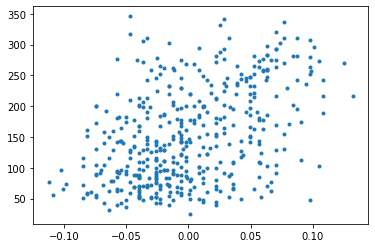

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_ = diabetes
X = diabetes.data[:,3] # 혈압
Y = diabetes.target # 당뇨 진행 정도
plt.plot(X,Y,'.')

In [6]:
temp=[]
for (i,j) in zip(X,Y):
    r1=(i-(-0.03))**2 + (j-120)**2
    r2=(i-0.025)**2 + (j-200)**2
    m=min(r1,r2)
    temp.append([r1,r2].index(m))
    m=m+1

In [7]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X,Y) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X,Y) if(t==1)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])

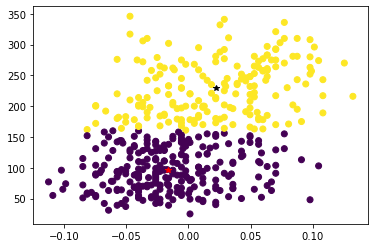

In [8]:
plt.scatter(X,Y,c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')

In [9]:
from sklearn.cluster import KMeans 

In [10]:
data = X.reshape(-1,1)
kmeans = KMeans(n_clusters=3, init='random',n_init=10,max_iter=300)
kmeans.fit(data)

KMeans(init='random', n_clusters=3)

In [11]:
centers = kmeans.cluster_centers_
print(centers)

[[ 0.06300357]
 [ 0.00054568]
 [-0.04896193]]


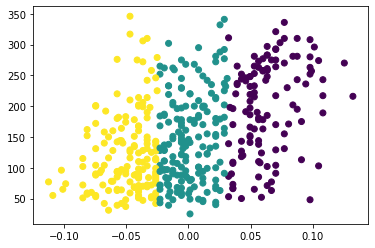

In [12]:
plt.scatter(X,Y,c=kmeans.labels_)

In [13]:
kmeans.inertia_

0.1559183679743929

In [14]:
kiner = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

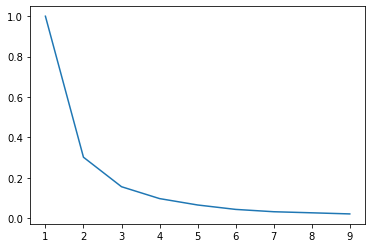

In [15]:
plt.plot(list(kiner.keys()), list(kiner.values()))

In [ ]:
kmeans clustering은 클러스터내의 오차제곱합(SSE)의 값이 최소가 되도록
클러스터의 중심을 결정해나가는 방법이다. SSE 값이 더 작다면
그 때의 클러스터가 더 적합하다는 것을 알 수 있다.
그래서 클러스터의 개수를 늘려가면서 그래프로 그려보았을 때,
SSE가 급격하게 작아지는 부분이 생기는데 클러스터의 개수가 3개일때가
최적의 클러스터 개수라고 생각한다.